# Solution Template

Use this notebook as a guide to implement your solution. Keep in mind that some cells should remain as they are so that you code works properly, for instance, the following cell in which the required libraries are imported.

In [218]:
import numpy as np
from scipy.spatial.distance import hamming
import seaborn as sns
# Add more libraries in case you need them in this cell.

# Localization

Hidden Markov Models (HMM) are used in a wide variety of applications such as speech recognition, part-of-speech tagging, machine traslation, handwriting recognition and many more. In this section we will see how HMM can be employed to infer the position of a robot in a static enviroment.

Let us represent the enviroment in which the robot roams around by a grid. Each square of the grid is either free or occupied, in which case we are talking about a position that the robot can not visit. Let $X_k$ be the position of the robot at time $t_k$. Given the latter, all the possible states of $X_k$ are the free spots of the grid: $S\{s_1,s_2,\dots,s_n\}$, where $n$ is the number of free squares. Speaking of "free squares," suppose we do not know where the robot is, so $P(X_0)=1/n$, $\forall s_i\in S$. Also, let $\text{neighnors}(s)$ be the set of empty squares adjacent to $s$ and let $N(s)$ be the size of this set. Then, the transition model of a robot that moves to any adjacent and empty square with equal probability is given by

$$
P(X_{k+1}=s_j|X_k=s_i)=T_{ij}=
\begin{cases}
\frac{1}{N(s_i)}~, & s_j\in \text{neighbors}(s_i)\\
0, & s_j\notin \text{neighbors}(s_i)
\end{cases}
$$

As it was mentioned, the robot will try to know where it is located given a set of observations. In this case, the robot is equipped with four sensors that indicate if there is an obstacle or not in a particular direction. We will assume all the possible directions are North (N), East (E), West (W) and South (S). Further, there is a sensor error rate $\epsilon$ and errors occur independently in the four sensor directions. For instance, the probability of getting all four measurements right is $(1-\epsilon)^4$, the probability of getting them all wrong is $\epsilon^4$. Given this, we have that there are 16 possible measurements for $E_k$ at a given time $t_k$. Also, let $d_{ik}$ be the discrepancy: the number of bits that are different from the true bits for the square $s_i$. Then, the probability that a robot in square $s_i$ would get a reading $e_k$ is equal to

$$
P(E_k=e_k|X_k=s_i)=O_{e_k,ii}=(1-\epsilon)^{4-d_{~ik}}~\epsilon^{~d_{~ik}}.
$$

For instance, the probability that a square with obstacles to the North and South would produce a reading (N,S,E) is equal to $(1-\epsilon)^3~\epsilon$.

Now that we know how to define the transition and sensor models we can carry out different types of inference: we can estimate a location given a set of measurements doing filtering; we can use smoothing to infer a past location given some observations; or we can use the Viterbi algorithm and obtain the most likely path that the robot took and that produced a given set of sensor values.

<img src="robot.png" alt="Drawing" style="width: 700px;"/>

Your mission is to carry out these three types of inference. In particular, for both filtering and smoothing, instead of using something like the figures shown above, use heatmaps in which the color changes depending on the probability of finding the robot at a certain square given a set of measurements. For the most likely path highlight the squares associated to said path. Keep in mind that you will have to simulate the random behavior of the sensors. 

## Transition Model

Let us define some matrices. Say we have $k$ possible states: $S=\{s_1,s_2\dots,s_k\}$. Then, the **transition matrix** is a $k\times k$ matrix in which $T_{ij} = P(X_{k+1}=s_j|X_{k}=s_i)$. In this case, each state is a position that can be occupied by the robot, or in other words, a free cell. Notice that in the map there are a total of 42 free cells, which means that the system has 42 possible states. The latter implies that the transitions matrix is a $42\times42$ matrix.

Use the following cell to write a code that computes the transition matrix. You might need more than one cell to do this in an organized fashion, so feel free to add as many cells as you want.

<img src="/workspaces/MA2014-Modulo3/robot-casillas-numeradas.png" alt="Mapa Robot" style="width: 700px;"/>

In [219]:
"INSERT YOUR CODE HERE"
#Matriz de estados iniciales 1x42, donde todos son 1/42
X0 = np.ones((42,1))/42
#crear una matriz de ceros de 42x42
T = np.zeros((42,42))
T[0,1] = 1
T[1,0] = 1/2; T[1,13] = 1/2
T[2,3] = 1/2; T[2,15] = 1/2
T[3,2] = 1/2; T[3,4] = 1/2
T[4,3] = 1/2; T[4,16] = 1/2
T[5,6] = 1
T[6,5] = 1/3; T[6,7] = 1/3; T[6,17] = 1/3
T[7,6] = 1/3; T[7,8] = 1/3; T[7,18] = 1/3
T[8,7] = 1/2; T[8,19] = 1/2
T[9,21] = 1/2; T[9,8] = 1/2
T[10,9] = 1/2; T[10,11] = 1/2
T[11,10] = 1/2; T[11,12] = 1/2
T[12,11] = 1/2; T[12,22] = 1/2
T[13,1] = 1/2; T[13,14] = 1/2
T[14,13] = 1/3; T[14,15] = 1/3; T[14,23] = 1/3
T[15,2] = 1/3; T[15,14] = 1/3; T[15,24] = 1/3
T[16,4] = 1/2; T[16,25] = 1/2
T[17,6] = 1/3; T[17,18] = 1/3; T[17,26] = 1/3
T[18,7] = 1/3; T[18,17] = 1/3; T[18,19] = 1/3
T[19,8] = 1/4; T[19,18] = 1/4; T[19,20] = 1/4; T[19,27] = 1/4
T[20,19] = 1/2; T[20,21] = 1/2
T[21,9] = 1/2;  T[21,28] = 1/2
T[22,12] = 1
T[23,14] = 1/3; T[23,24] = 1/3; T[23,31] = 1/3
T[24,15] = 1/3; T[24,23] = 1/3; T[24,32] = 1/3
T[25,16] = 1/2; T[25,33] = 1/2
T[26,17] = 1/2; T[26,36] = 1/2
T[27,19] = 1
T[28,21] = 1/2; T[28,39] = 1/2
T[29,30] = 1
T[30,29] = 1/2; T[30,31] = 1/2
T[31,23] = 1/3; T[31,30] = 1/3; T[31,32] = 1/3
T[32,24] = 1/2; T[32,31] = 1/2
T[33,25] = 1/2; T[33,34] = 1/2
T[34,33] = 1/2; T[34,35] = 1/2
T[35,34] = 1/2; T[35,36] = 1/2
T[36,26] = 1/3; T[36,35] = 1/3; T[36,37] = 1/3
T[37,36] = 1
T[38,39] = 1
T[39,28] = 1/3; T[39,38] = 1/3; T[39,40] = 1/3
T[40,39] = 1
T[41,41] = 1 #por si empieza en 41 se queda en 41

Also, define a dictionary that will contain all the possible states of the system. Remember that each state is a location that can be stored as a tuple. Pick the origin as the lower left corner of the map.

In [220]:
"""
    Store the states of the system in a dictionary following this format:
    S = {0: (0,0), 1: (1, 0), ..., 41: (15, 3)} 
"""

S = {0:(0,0), 1:(1,0) , 2:(3,0), 3:(4,0), 4:(5,0), 5:(7,0), 6:(8,0), 7:(9,0), 8:(10,0), 9:(12,0), 10:(13,0), 11:(14,0), 12:(15,0),
    13:(1,1), 14:(2,1), 15:(3,1), 16:(5,1), 17:(8,1), 18:(9,1), 19:(10,1), 20:(11,1), 21:(12,1), 22:(15,1), 
    23:(2,2), 24:(3,2), 25:(5,2), 26:(8,2), 27:(10,2), 28:(12,2),
    29:(0,3), 30:(1,3), 31:(2,3), 32:(3,3), 33:(5,3), 34:(6,3), 35:(7,3), 36:(8,3), 37:(9,3), 38:(11,3), 39:(12,3), 40:(13,3), 41:(15,3)}


## Sensor Model

At this point you know that there are 16 possible measurements for $E_k$ at a given time $t_k$. For each measurement you will need to define a matrix that stores the probabilities of getting a reading $e_k$ given that the robot is at the location $s_i$:

$$
P(E_k=e_k|X_k=s_i)=O_{e_k,ii}=(1-\epsilon)^{4-d_{~ik}}~\epsilon^{~d_{~ik}}.
$$

In the following cell, write code for computing the matrices of the sensor model. Notice that you will have to define an error rate $\epsilon$.

In [221]:
#Crear una matriz de 42x1 para la cantidad de vecinos de cada casilla
sn = np.zeros((42,1))
sn[0] = 1; sn[1:5] = 2; sn[5] = 1; sn[6:8] = 3; sn[8:14] = 2; sn[14:16] = 3; sn[16] = 2; sn[17:19] = 3; sn[19] = 4
sn[20:22] = 2; sn[22] = 1; sn[23:25] = 3; sn[25:27] = 2; sn[27] = 1; sn[28] = 2; sn[29] = 1; sn[30] = 2; sn[31] = 3; sn[32:36] = 2
sn[36] = 3; sn[37:39] = 1; sn[39] = 3; sn[40] = 1; sn[41] = 0
#Pensandolo mejor creo que es mejor tener la una matriz con la lectura correcta de los sensores y despues calcular distancia hamming para 
#calcular la cantidad de bits diferentes y poner la probabilidad de cada lectura

In [222]:
#Crear una funcion para calcular la distancia de hamming, se uso la libreria scipy 
def distanciaHamming(a,b):
    x = hamming(a,b)*len(a)
    return x

print(distanciaHamming([1,1,1,1],[0,0,0,0]))

#Crear una funcion que devuelva una matriz de 42x42 con la probabilidad de cada estado en la diagonal principal
def crearMatriz(matriz, array, error):
    matrizProbabilidad = np.zeros((42,42))
    for i in range (0,42):
        matrizProbabilidad[i,i] = (1-error)**(4-distanciaHamming(matriz[i],array))*(error)**(distanciaHamming(matriz[i],array))
    return matrizProbabilidad 


4.0


In [223]:
"""
    #Pruebas:
    x = np.zeros((42,4))
    for i in range (0,42):
        x[i] = [0,0,0,0]
    prueba = crearMatriz(x, [1,1,1,1], 0)
    print(prueba)

    prueba2 = crearMatriz(x, [0,0,0,0], 0)
    print(prueba2)
"""

'\n    #Pruebas:\n    x = np.zeros((42,4))\n    for i in range (0,42):\n        x[i] = [0,0,0,0]\n    prueba = crearMatriz(x, [1,1,1,1], 0)\n    print(prueba)\n\n    prueba2 = crearMatriz(x, [0,0,0,0], 0)\n    print(prueba2)\n'

In [224]:
#Crear matriz con la lectura correcta de los sensores, hacer esto con alguien mas aka Jesus para escribirlo
sr = np.zeros((42,4))
#sr[] = [E, S, W, N]
sr[0] = [0,1,1,1]; sr[1] = [1,1,0,0]; sr[2] = [0,1,1,0]; sr[3] = [0,1,0,1]; sr[4] = [1,1,0,0]; sr[5] = [0,1,1,1]; sr[6] = [0,1,0,0]
sr[7] = [0,1,0,0]; sr[8] = [1,1,0,0]; sr[9] = [0,1,1,0]; sr[10] = [0,1,0,1]; sr[11] = [0,1,0,1]; sr[12] = [1,1,0,0]; sr[13] = [0,0,1,1] 
sr[14] = [0,1,0,0]; sr[15] = [1,0,0,0]; sr[16] = [1,0,1,0]; sr[17] = [0,0,1,0]; sr[18] = [0,0,0,1]; sr[19] = [1,1,1,1]; sr[20] = [0,1,0,1]
sr[21] = [1,0,0,0]; sr[22] = [1,0,1,1]; sr[23] = [0,0,1,0]; sr[24] = [1,0,0,0]; sr[25] = [1,0,1,0]; sr[26] = [1,0,1,0]; sr[27] = [1,0,1,1]
sr[28] = [1,0,1,0]; sr[29] = [0,1,1,1]; sr[30] = [0,1,0,0]; sr[31] = [0,0,0,1]; sr[32] = [1,0,0,1]; sr[33] = [0,0,1,1]; sr[34] = [0,1,0,1]
sr[35] = [0,1,0,1]; sr[36] = [0,0,0,1]; sr[37] = [1,1,0,0]; sr[38] = [0,1,1,1]; sr[39] = [0,0,0,1]; sr[40] = [1,1,0,1]; sr[41] = [1,1,1,1]

In [377]:
#Crear una funcion para simular un camino de manera aleatoria
def SimularCamino(T,tamano):
    camino = np.zeros((tamano))
    camino[0] = np.random.randint(1,42)
    for i in range (1,tamano):
        camino[i] = np.random.choice(42,1,p=T[int (camino[i-1])])[0]
    return camino

#Crear una funcion para calcular la lectura de los sensores
def LecturaCorrecta(sr, camino):
    lectura = np.zeros((len(camino),4))
    for i in range (0,len(camino)):
        lectura[i] = sr[int (camino[i])]
    return lectura

#Crear funcion para ver si un sensor hace una lectura incorrecta
def SimularError(lectura, error):
    for item in lectura:
        for i in range (0,4):
            if np.random.rand() < error:
                if item[i] == 0:
                    item[i] = 1
                else:
                    item[i] = 0
    return lectura

#Crear funcion para pasar la lectura del sensor a binario
def LecturaBinaria(lectura):
    lista = []
    for item in lectura:
        numero = 0
        for i in range (0,4):
            numero = numero + item[i]*(2**(3-i))
        lista.append(numero)
    return lista

#Pruebas:
error = 0.1
x = SimularCamino(T,100)
print(x)
y = LecturaCorrecta(sr,x)
print(y)
print('------')
z = SimularError(y,error)
print(z)
print('------')
a = LecturaBinaria(z)
print(a)



[35. 34. 33. 25. 16. 25. 33. 25. 16. 25. 16. 25. 33. 34. 35. 36. 35. 36.
 35. 34. 35. 34. 33. 25. 16. 25. 33. 34. 35. 36. 26. 36. 26. 17. 18. 17.
 18. 19. 18.  7.  6.  7. 18. 17. 26. 36. 35. 34. 33. 34. 35. 34. 33. 34.
 35. 36. 35. 36. 35. 34. 33. 25. 33. 25. 33. 25. 16.  4.  3.  2. 15. 14.
 15. 14. 13.  1. 13. 14. 15.  2. 15. 14. 13.  1.  0.  1. 13. 14. 15. 14.
 13.  1. 13. 14. 15. 24. 23. 31. 32. 31.]
[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [1. 0. 1. 0.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 1.]
 [0. 1. 

In [226]:
#Creamos las matrices de probabilidad para cada estado
error = 0.1
me0 = crearMatriz(sr, [0,0,0,0], error)
#PRUEBA CON [0,1,1,1] Y WOLFRAMN Power[\(40)1-0.1\(41),\(40)4-3\(41)]*Power[\(40)0.1\(41),3] 
me1 = crearMatriz(sr, [0,0,0,1], error)
me2 = crearMatriz(sr, [0,0,1,0], error)
me3 = crearMatriz(sr, [0,0,1,1], error)
me4 = crearMatriz(sr, [0,1,0,0], error)
me5 = crearMatriz(sr, [0,1,0,1], error)
me6 = crearMatriz(sr, [0,1,1,0], error)
me7 = crearMatriz(sr, [0,1,1,1], error)
me8 = crearMatriz(sr, [1,0,0,0], error)
me9 = crearMatriz(sr, [1,0,0,1], error)
me10 = crearMatriz(sr, [1,0,1,0], error)
me11 = crearMatriz(sr, [1,0,1,1], error)
me12 = crearMatriz(sr, [1,1,0,0], error)
me13 = crearMatriz(sr, [1,1,0,1], error)
me14 = crearMatriz(sr, [1,1,1,0], error)
me15 = crearMatriz(sr, [1,1,1,1], error)


Keep in mind that the readings can be understood as binary numbers of four digits: `0000`, `0001`,..., `1111`. Regarding the order of the binary measurements, use this convention: `ESWN`; that is, if the robot has obstacles in both the North and East directions, then an error-free measurement should be the binary number `1001`. For convenience, store the "observation matrices" in a dictionary. 

In [227]:
"""
    Store the states of the system in a dictionary following this format:
    O = {0000: Matrix of measurement 0000, ..., 1111: Matrix of measurement 1111}
"""

O ={0: me0, 1: me1, 2:me2, 3:me3, 4:me4, 5:me5, 6:me6, 7:me7, 8:me8, 9:me9, 10:me10, 11:me11, 12:me12, 13:me13, 14:me14, 15:me15}

## Filtering

In this context, **filtering** can be used to get an idea of the robot's location given a set of measurements. As it was mentioned in class, this type of inference is the act of, given some evidence up to a time $t_k$, we want to infer what is the probability distribution of the state $X_k$: $P(X_k|E_{1:k}=e_{1:k})$. Provide the `filtering` function with some evidence, which is going to be a sequence of bynary numbers of four digits, and compute the probability distribution of the state of the system at time $t_k$. Notice that said distribution should be a vector of 42 components. Do not forget to take into account the stochastic nature of the measurement process.

In [354]:
def filtering(E, O, T, X0):
    
    forward = X0
    
    for evidence in E:
        forward = O[evidence] @ T.T @ forward
        forward = forward / forward.sum()
        
    return forward

In [378]:
#0->1->13->14 con un error en el ultimo sensor
#E = [[0,1,1,1],[1,1,0,0],[0,0,1,1],[0,1,0,0]]
E = a
print(E)

[5.0, 13.0, 3.0, 2.0, 11.0, 10.0, 3.0, 10.0, 10.0, 11.0, 14.0, 10.0, 3.0, 5.0, 5.0, 1.0, 5.0, 1.0, 5.0, 5.0, 5.0, 5.0, 3.0, 10.0, 10.0, 11.0, 3.0, 5.0, 5.0, 1.0, 10.0, 0.0, 10.0, 2.0, 9.0, 3.0, 11.0, 7.0, 1.0, 4.0, 4.0, 7.0, 1.0, 2.0, 15.0, 1.0, 7.0, 5.0, 3.0, 5.0, 1.0, 13.0, 2.0, 5.0, 5.0, 5.0, 5.0, 1.0, 4.0, 5.0, 3.0, 10.0, 3.0, 10.0, 2.0, 10.0, 10.0, 8.0, 7.0, 14.0, 8.0, 4.0, 9.0, 4.0, 3.0, 12.0, 3.0, 1.0, 9.0, 6.0, 8.0, 4.0, 3.0, 14.0, 7.0, 13.0, 3.0, 0.0, 8.0, 12.0, 3.0, 0.0, 3.0, 12.0, 8.0, 8.0, 3.0, 1.0, 1.0, 1.0]


### Visualize

Visualize your results using a heatmap. The `seaborn` library might be very useful for this purpose. In order to do this, write a function that receives the vector $X_k$ and returns a heatmap of a $4\times16$ matrix in which each entry is the probability that the robot is occupying the location associated to said entry.

In [379]:
def view_heatmap(state):
    
    """
    The purpose of this function is to create a heatmap based on the state of the system at a given time. 
    The variable state is a vector of 42 components where each entry is the probability of finding the robot 
    at a certain location. The function does not have to return anything, it should just show the heatmap.
    """
    sns.heatmap(state, cmap='vlag')

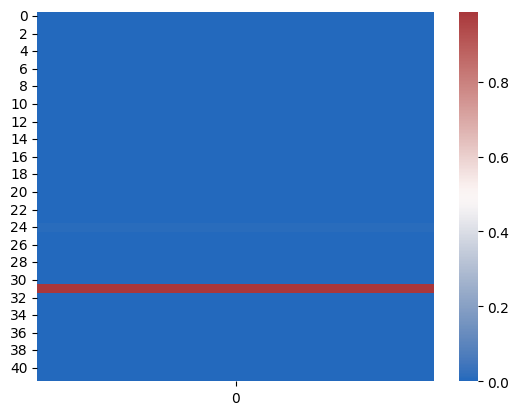

In [380]:
view_heatmap(filtering(E, O, T, X0))

## Smoothing

As for **smoothing**, we can use it to infer a past state given a set of measurements: that is, we wish to obtain $P(X_j|E_{1:k}=e_{1:k})$, $1\leq j<k$. Supply some evidence and run the `smoothing` function. Check that what the functions returns makes sense.

In [232]:
def smoothing(E, O, T, X0, k):
    
    forward = filtering(E[:k], O, T, X0)
    
    backward = np.ones((T.shape[0],1))
    
    for evidence in E[-1:k-1:-1]:
        backward = T @ O[evidence] @ backward
    
    smooth = forward * backward
    smooth = smooth / smooth.sum()
    
    return smooth

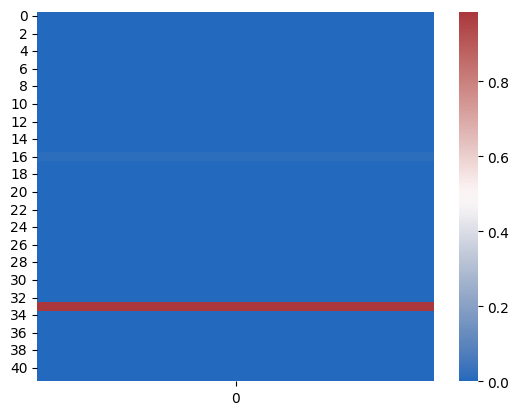

In [381]:
E = a

view_heatmap(smoothing(E, O, T, X0, 3))

## Most Likely Sequence of States

Finally, for obtaining the most likely sequence that produced the given evidence, we need to compute

$$
\max_{x_{1:k}}P(x_{1:k}|E_{1:k}=e_{1:k}).
$$

As it was mentioned in class, the most likely sequence is the one that has the highest probability, which is obtained by the **Viterbi algorithm**. 

For this part of the assignment, pick a path in advance and record the set of measurements the robot would take along the road. Do not forget to include the possibility of getting some incorrect measurements in this process.

In [234]:
def most_likely_sequence(E, O, S, T, X0):
    
    sequences = np.zeros((T.shape[0], len(E)))
    states = np.zeros((T.shape[0], len(E)))
    ones = np.ones((T.shape[0], T.shape[0]))
    sequences[:, 0] = (O[E[0]] @ X0).reshape((T.shape[0],))
    message = sequences[:, 0].reshape((T.shape[0], 1))
    
    for i, evidence in enumerate(E[1:]):
        message = (T @ O[evidence]) * (message * ones)
        states[:, i+1] = np.argmax(message, axis=0).reshape((T.shape[0],))
        message = np.max(message, axis=0).reshape((T.shape[0], 1))
        sequences[:, i+1] = message.reshape((T.shape[0],))
        
    states = states.astype('int32')
    s = np.argmax(sequences[:, -1], axis=0)
    best_sequence = [S[s]]
    
    for i in range(len(E)-1, 0, -1):
        s = states[s, i]
        best_sequence.append(S[s])
        
    best_sequence = best_sequence[::-1] 
    
    return best_sequence

In [382]:
E = a

most_likely_sequence(E, O, S, T, X0)

[(7, 3),
 (6, 3),
 (5, 3),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (7, 3),
 (8, 3),
 (7, 3),
 (6, 3),
 (7, 3),
 (6, 3),
 (5, 3),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (8, 2),
 (8, 1),
 (8, 2),
 (8, 1),
 (9, 1),
 (10, 1),
 (10, 2),
 (10, 1),
 (9, 1),
 (9, 0),
 (8, 0),
 (7, 0),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (7, 3),
 (6, 3),
 (5, 3),
 (6, 3),
 (5, 3),
 (6, 3),
 (5, 3),
 (6, 3),
 (7, 3),
 (6, 3),
 (7, 3),
 (8, 3),
 (7, 3),
 (6, 3),
 (5, 3),
 (5, 2),
 (5, 3),
 (5, 2),
 (5, 1),
 (5, 2),
 (5, 1),
 (5, 0),
 (4, 0),
 (3, 0),
 (3, 1),
 (2, 1),
 (3, 1),
 (2, 1),
 (1, 1),
 (1, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (3, 0),
 (3, 1),
 (2, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (2, 1),
 (3, 1),
 (2, 1),
 (1, 1),
 (2, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (3, 2),
 (2, 2),
 (2, 3),
 (3, 3),
 (2, 3)]

For visualization purposes, define a vector of 42 components in which the entry associated to a state that belongs to the most likely sequence is set to one, otherwise, set the entry to zero. Call the `view_heatmap` function, which should receive the vector that you just defined as an input, and obtain the corresponding heatmap. The shown path should be the sequence of locations that the robot occupied.

In [236]:
"""
You will have to write some code here for computing your vector of zeros and ones. Store this information
as "vector
"""
#NOTA: NO CREO QUE ESTO SE VEA BIEN PUES SOLO MENCIONA SI PASO POR ALLI, NO CUANTAAS VECES NI CUANDO SE PUEDE CAMBIAR EN UN FUTURO
SS = {v: k for k, v in S.items()}
def visualizarSecuencia(secuencia, SS):
    vector = np.zeros((42,1))
    for state in secuencia:
        vector[SS[state]] = 1
    
    return vector
    

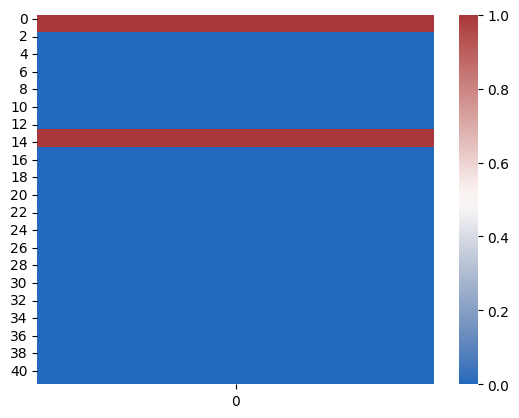

In [237]:
vector = visualizarSecuencia(most_likely_sequence(E, O, S, T, X0), SS)
view_heatmap(vector)